Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

Datasets

In [3]:
df=pd.read_csv("IRIS.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

3

In [7]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization

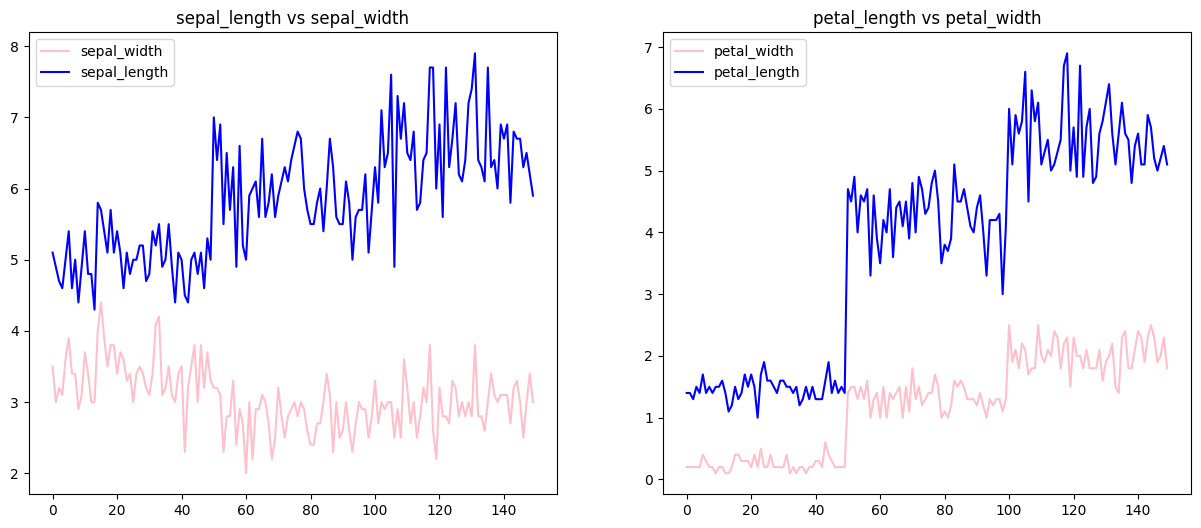

In [11]:
fig ,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(df['sepal_width'],label="sepal_width",color='pink')
ax[0].plot(df['sepal_length'],label="sepal_length",color='blue')
ax[0].set_title('sepal_length vs sepal_width')
ax[0].legend()

ax[1].plot(df['petal_width'],label="petal_width",color='pink')
ax[1].plot(df['petal_length'],label="petal_length",color='blue')
ax[1].set_title('petal_length vs petal_width')
ax[1].legend()
plt.show()


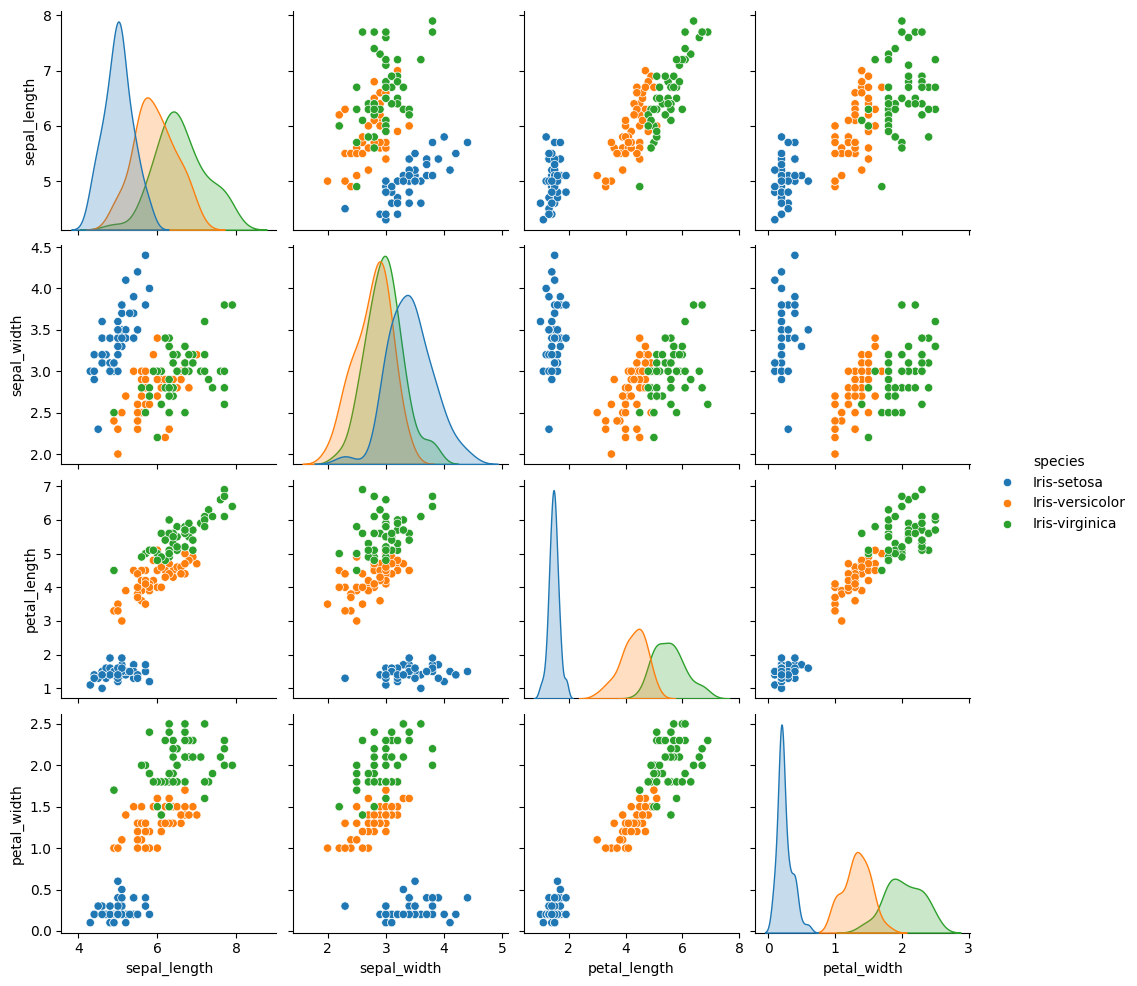

In [12]:
sns.pairplot(df,hue='species')

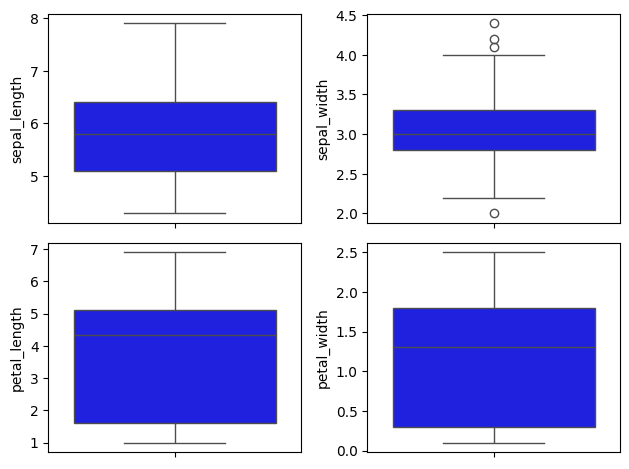

In [13]:
plt.subplot(2,2,1)
sns.boxplot(df["sepal_length"],color="blue")
plt.subplot(2,2,2)
sns.boxplot(df["sepal_width"],color="blue")
plt.subplot(2,2,3)
sns.boxplot(df["petal_length"],color="blue")
plt.subplot(2,2,4)
sns.boxplot(df["petal_width"],color="blue")
plt.tight_layout()
plt.show()

### split the dataset into Independent and Dependent variables

In [14]:
# independent variable
X=df.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# dependent variable
y=df['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

### Create a instance of the KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier(n_neighbors=5)
# n_neighbors is the hyerperameters 

In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.97


### spliting the data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [20]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [21]:
y_pred=knn.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

